In [13]:
import cv2
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from numba import cuda
import matplotlib.pyplot as plt
from google.colab import drive
import os
import random
import matplotlib.image as mpimg

In [2]:
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 5s 0us/step


In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip -qq '/content/drive/MyDrive/AIE/dogs-vs-cats.zip'

In [9]:
!unzip -qq './test1.zip'

In [10]:
!unzip -qq './train.zip'

In [12]:
path = "/content/train/"
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

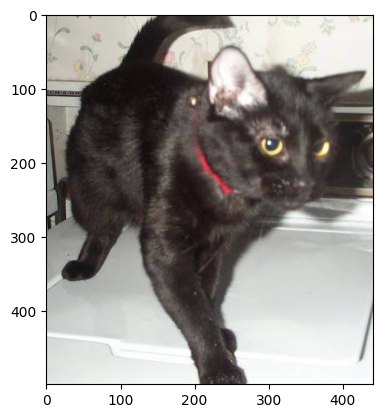

In [14]:
image = mpimg.imread(path + full_names[0])
plt.imshow(image)
plt.show()

In [15]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

35363/35363 [==============================] - 0s 0us/step
tub (22.80%)


In [16]:
def resize_and_preprocess_vgg(image):
  image = cv2.resize(image, dsize=(224,224))
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
  return preprocess_input(image)

In [17]:
def predict_vgg(model, image):
  yhat = model.predict(image)
  label = decode_predictions(yhat)
  return label[0][0][1]

1/1 [==============================] - 0s 31ms/step


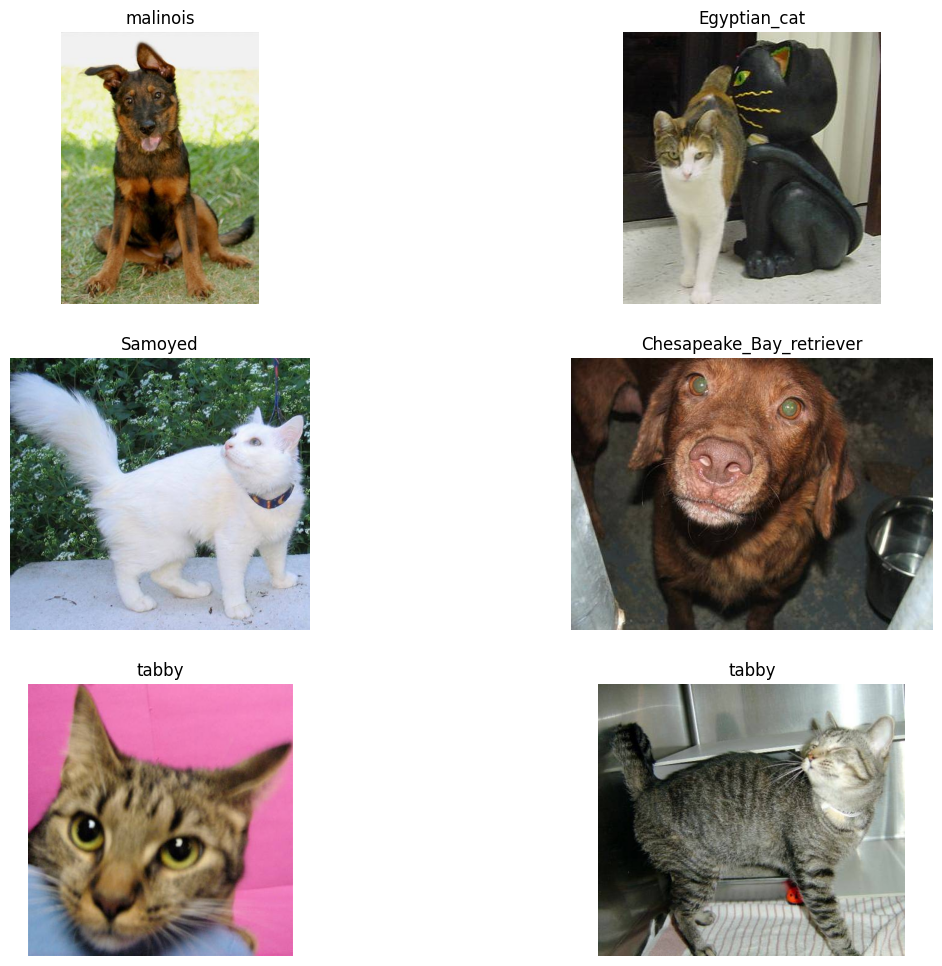

In [18]:
plt.figure(figsize=(14,12))
idx = 1
for each in random.choices(full_names, k=6):
  image = mpimg.imread(path + each)
  plt.subplot(3,2,idx)
  idx += 1
  plt.imshow(image)

  image = resize_and_preprocess_vgg(image)
  result = predict_vgg(model, image)

  plt.title(result)
  plt.axis('off')

plt.show()